In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [53]:
#Read the file and print first five rows-
data = pd.read_csv('Churn_Modelling.csv')
print(data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [54]:
#print the last five rows of the data
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [55]:
#checking the shape of the data to get the numbers of rows and columns
data.shape

(10000, 14)

In [56]:
data.isnull().count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [57]:
#sns.regplot(data['EstimatedSalary'].values,data['Exited'].values)

The data has 10000 rows and does not contains any missing value. 

In [58]:
#df =data.groupby('EstimatedSalary').mean()
#sns.barplot(x=df.Exited,y = df.index)
#sns.barplot(x=df.Exited,y = df.index)

#print(df.head())

In [59]:
# Checking the names of the features
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

The columns 'RowNumber' and 'Surname' should be dropped because they are not related to the exit or stay of a customer.

In [60]:
#dropping the above mentioned columns
data.drop(['Surname', 'RowNumber'], axis=1, inplace=True)

In [61]:
data.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [62]:
# obtaining the information about dataset-datatype of each feature, number of non null entries
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
CustomerId         10000 non-null int64
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [63]:
data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

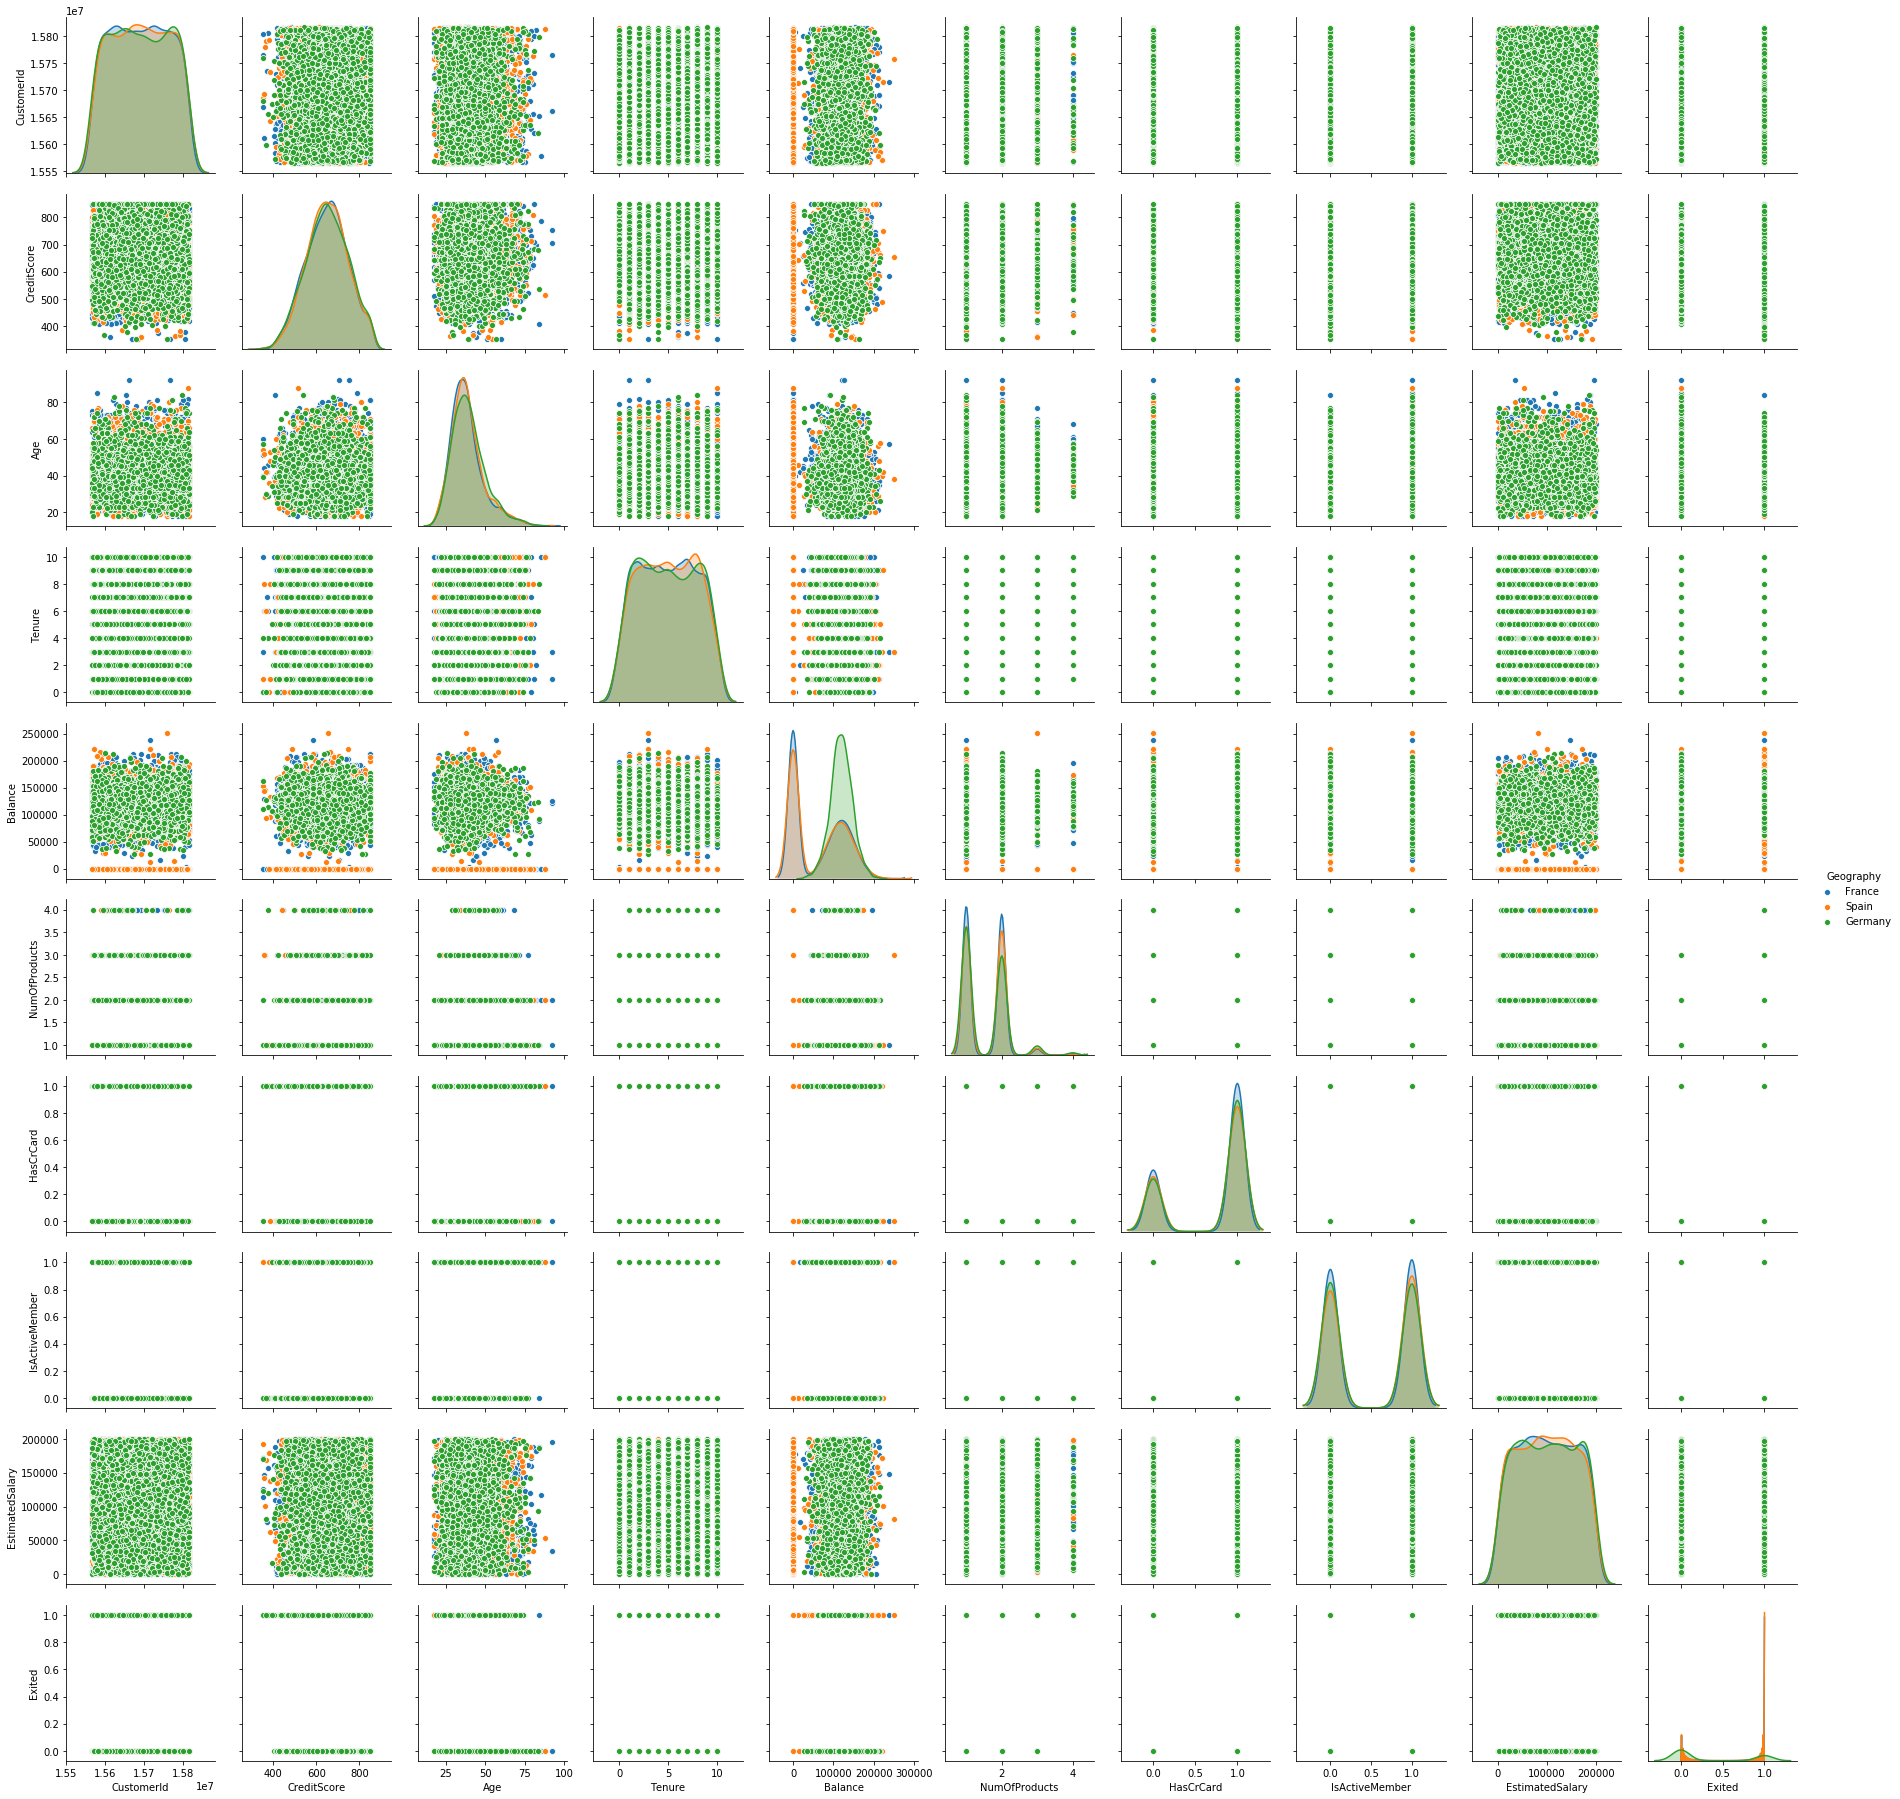

In [64]:
#Pair plot of the dataset
sns.pairplot(data, hue="Geography")
#sns.set(style="ticks", color_codes=True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F7CFA1B240>,
      dtype=object)

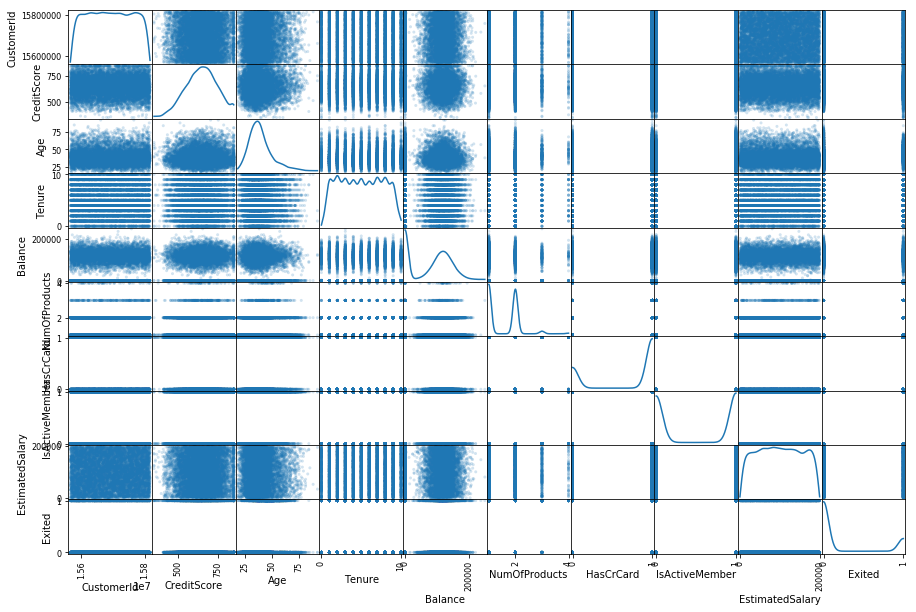

In [65]:
#scatter matrix for dataset
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.2, figsize=(15, 10), diagonal='kde')


In [15]:
data_corr = data.corr()

Pairplot and scatter matrix were plotted to observe correlation(if any) between the features and also to check the distribution of data. Data is not showing any correlation between the features. Data points are not normally distributed. 

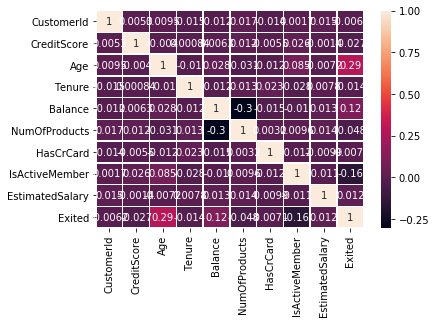

In [66]:
sns.heatmap(data_corr, annot=True, linewidths=.5)

As shown from the above heatmap the data features are not showing any correlation..

In [67]:
#Checking the target variable value counts
data.Exited.value_counts(dropna=False)

0    7963
1    2037
Name: Exited, dtype: int64

In [68]:
#percentage of customers who stayed and exited
(data.Exited.value_counts()/len(data))*100

0    79.63
1    20.37
Name: Exited, dtype: float64

0    7963
1    2037
Name: Exited, dtype: int64


Text(0.5, 1.0, 'Distribution of number of customers left and stayed')

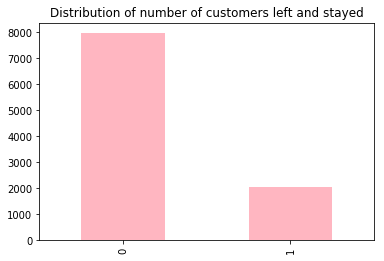

In [69]:
values = data.Exited.value_counts(dropna=False)
print(values)
values.plot(kind='bar', color='lightpink')
plt.title('Distribution of number of customers left and stayed')

This is a class imbalance problem as shown in the above bar plot. so while selecting the algorithm wwe must keep inmind the class imbalance.